## Multiple Linear Regression 

### 50 Startups
This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

#### Problem Statement: Where a starup should invest to be more profitable.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
# Importing the dataset
dataset = pd.read_csv('datasets/50_Startups.csv')

In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

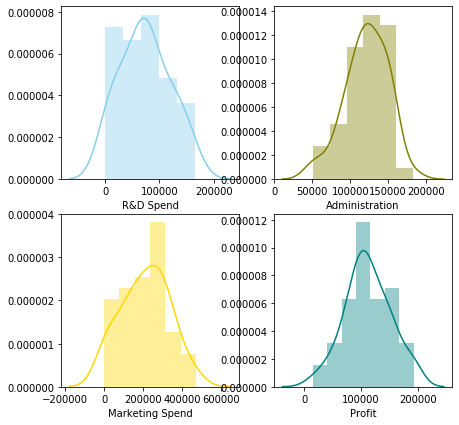

In [6]:
f, axes = plt.subplots(2, 2, figsize=(7,7))
sb.distplot( dataset["R&D Spend"] , color="skyblue", ax=axes[0, 0])
sb.distplot( dataset["Administration"] , color="olive", ax=axes[0, 1])
sb.distplot( dataset["Marketing Spend"] , color="gold", ax=axes[1, 0])
sb.distplot( dataset["Profit"] , color="teal", ax=axes[1, 1])

In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


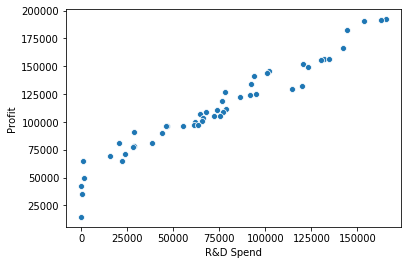

In [8]:
sb.scatterplot(dataset["R&D Spend"] , dataset["Profit"])

In [9]:
np.corrcoef(dataset["R&D Spend"] , dataset["Profit"])[0,1]

0.9729004656594832

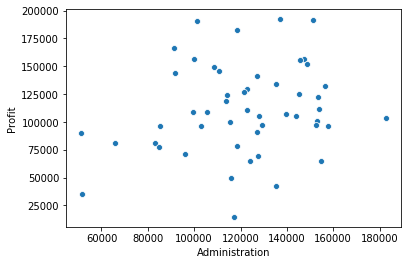

In [10]:
sb.scatterplot(dataset["Administration"] , dataset["Profit"])

In [11]:
np.corrcoef(dataset["Administration"] , dataset["Profit"])[0,1]

0.20071656826872128

In [12]:
from scipy.stats.stats import pearsonr
pearsonr(dataset["Administration"] , dataset["Profit"])

(0.20071656826872136, 0.16221739470358268)

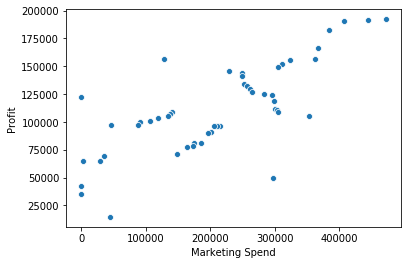

In [13]:
sb.scatterplot(dataset["Marketing Spend"] , dataset["Profit"])

In [14]:
np.corrcoef(dataset["Marketing Spend"] , dataset["Profit"])[0,1]

0.7477657217414767

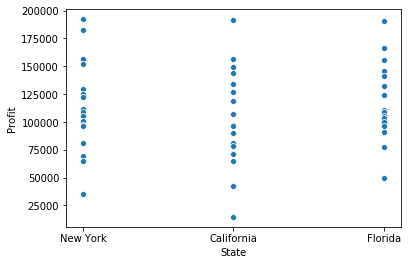

In [15]:
sb.scatterplot(dataset["State"] , dataset["Profit"])

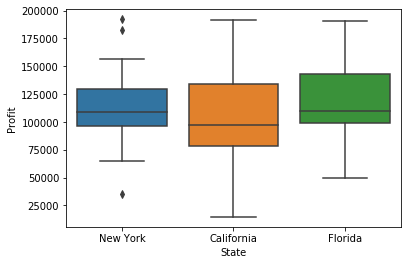

In [16]:
sb.boxplot(data = dataset, x = "State", y = "Profit")
plt.show()

In [17]:
#Encoding categorical data
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()
'''

X_state = pd.get_dummies(X['State'], drop_first = True)

In [18]:
X_state.head(3)

,Florida,New York
0,0,1
1,0,0
2,1,0


In [19]:
X.drop('State',axis=1,inplace = True)

In [20]:
# Concat State
dataset = pd.concat([X,X_state],axis=1)

In [21]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 0)

In [23]:
len(X_train),len(y_train)

(40, 40)

In [24]:
len(X_test),len(y_test)

(10, 10)

In [25]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
regressor.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [27]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [28]:
regressor.score(X_test, y_test)

0.9347068473282423

In [29]:
regressor.score(X_train, y_train)

0.9501847627493607

## Backward Elimination

In [30]:
import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [31]:
#here dataset is X - features
X = np.append(arr = np.ones((50,1)).astype(int), values = dataset, axis = 1) 

In [32]:
X_opt = X[:, [0,1,2,3,4,5]]

In [33]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        11:58:45   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_opt = X[:, [0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           8.49e-29
Time:                        11:58:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           4.53e-30
Time:                        11:58:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_opt = X[:, [0,1,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.16e-31
Time:                        11:59:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X_opt = X[:, [1,3]]
X_opt

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [